
# ECON 320 Lab Exercise : Week 3 — OLS & SLR Assumptions

- **Name** : *[Your Name]*  
- **Lab Section**: *[Your Lab Section]*  
- **Attendance Code (Week 3)**: *[Enter code]*  

#### **Submit this notebook as an HTML/PDF on Canvas.**

---

### 🧪 Connection to Lecture

This lab mirrors **Part C** of the lecture:

- First, you will **recreate the baseline DGP** (where all four assumptions SLR.1–SLR.4 hold).  
- Next, you will **violate the assumptions one by one** to see what happens.  

👉 Only the experiment on **SLR.1 (linearity in parameters)** is **required**.  
The other violations (SLR.2–SLR.4) are <span style="color: green; font-weight: bold;">optional but strongly encouraged</span>, since they show why the assumptions really matter.  

<hr style="border: 1px dotted #bbb;">


### 🎯 Learning Goals
By the end of this lab, you will be able to:
1. Understand intuitions of assumptions **SLR.1–SLR.4**.
2. Build a **DGP** that satisfies the assumptions and verify **Theorem 2.1 (unbiasedness)** numerically.
3. Create targeted **violations** (nonlinearity, non-random sampling, no variation in $x$, omitted variable) and diagnose the impact on OLS.



---

### 🏁 Warm-up : Baseline DGP — when SLR.1–SLR.4 hold

**Assumptions checklist:**
- **SLR.1 Linear in parameters** ✅  
- **SLR.2 Random sampling** ✅   
- **SLR.3 Variation in \(x\)** ✅  
- **SLR.4 Zero conditional mean** ✅   

**What you should see:** 
- The **average of the estimates** should be very close to the true $\beta_1$. (unbiasedness)

<hr style="border: 1px dotted #bbb;">

The following code cell simulates \(B=1000\) datasets, each with \(n=200\) observations, from the DGP:
$$
y = \beta_0 + \beta_1 x + u
$$
where $\beta_0 = 2$, $\beta_1 = 1.5$, and $u \sim N(0, \sigma^2)$ with $\sigma = 2$.
Run the cell to verify Theorem 2.1 numerically.



In [16]:
# **************** You don't need to modify anything in this cell.*****************
# **************** Just understand what it does. It will be useful later.*****************

# Ka Yan defined the following function to calculate the OLS estimates
def ols_ky_manual(y, x):

    # Number of observations
    n = len(y)

    # Calculate means
    x_mean = x.mean()
    y_mean = y.mean()
    
    # Calculate OLS estimates
    beta1_hat = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
    beta0_hat = y_mean - beta1_hat * x_mean
    
    return beta0_hat, beta1_hat

In [17]:
# **************** You don't need to modify anything in this cell.*****************
# **************** Just understand what it does. It will be useful later.*****************

# Q0. DGP for baseline linear regression model
import numpy as np
import numpy.random as rng
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 

# Setting 1: number of random samples
B = 1000 

# Setting 2: sample size per dataset
n = 200 

# Setting 3: true parameters
beta0_true, beta1_true = 2.0, 1.5
sigma = 2.0

# Create a empty list to store slope estimates
b1_estimates = []

# Simulate B datasets
# Repeat B times: generate data, fit OLS, store slope estimate
for _ in range(B):

    # x is randomly sampled from uniform(-3, 3)
    x = rng.uniform(-3, 3, size=n)

    # u is randomly sampled from normal(0, sigma)
    u = rng.normal(0, sigma, size=n)

    # y is generated from the DGP
    y = beta0_true + beta1_true*x + u

    # Fit OLS and store the slope estimate
    b0, b1 = ols_ky_manual(y, x)

    # Append the slope estimate to the list
    b1_estimates.append(b1)

print(f"True β1 = {beta1_true:.2f}")
print(f"Mean of estimated slopes over {B} samples = {np.mean(b1_estimates):.3f}")

True β1 = 1.50
Mean of estimated slopes over 1000 samples = 1.504



---

### **Tasks (2 required questions in total)**




### ❓ Q1. (Required) Define a function to calculate the OLS estimate

Write your own function `ols_manual_week3lab(x, y)` to compute the OLS estimates
$$
\hat\beta_1 = \frac{\sum (x_i - \bar x)(y_i - \bar y)}{\sum (x_i - \bar x)^2},
\qquad
\hat\beta_0 = \bar y - \hat\beta_1 \bar x.
$$

1. Apply your function to the study-hours dataset  
   $$x=(2,3,5,4,6),\quad y=(50,60,80,70,90).$$
2. Verify your result with `statsmodels`.


In [18]:
# Q1. Put your answer here

# Step 1. Define your own function to calculate the OLS estimate

# Step 2. Apply your function to the study hour and test score data

# Step 3. Compare your results with statsmodels' results


<hr style="border: 1px dotted #bbb;">

#### 1️⃣ Violate SLR.1 — Nonlinearity (wrong functional form)


>**SLR.1 — Linear in parameters**  
>Model is linear in the unknown coefficients:  
>$$ 
>y_i = \beta_0 + \beta_1 x_i + u_i 
>$$  
>*Meaning:* We’re fitting a straight-line relation in the parameters (even if we later add things like $x^2$, the model stays linear in the betas).  
>*If it fails:* The line you fit is the wrong shape → systematic patterns left in residuals.

**How we'll break it:** For example, the true DGP follows a **quadratic** relation,
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + u
$$
but we estimate a **linear** model:
$$
y = \beta_0 + \beta_1 x + u
$$

**Expect:** The OLS estimate of $\beta_1$ will be **biased**.

<hr style="border: 1px dotted #bbb;">

### ❓ Q2. (Required) Simulate data and estimate OLS under nonlinearity
1. Simulate \(B=1000\) datasets, each with \(n=200\) observations, from the nonlinear DGP:
   $$
    y = \beta_0 + \beta_1 x + \beta_2 x
    $$
    where $\beta_0 = 2$, $\beta_1 = 1.5$, $\beta_2 = 0.5$, and $u \sim N(0, \sigma^2)$ with $\sigma = 2$.
2. For each dataset, use the `ols_manual_week3lab(x, y)` function you defined in Q1 to estimate the slope coefficient $\hat{\beta}_1$ from the misspecified linear model:

    $$
    y = \beta_0 + \beta_1 x + u
    $$
3. Calculate and print the average of the estimated slope coefficients $\hat{\beta}_1$ across all datasets.



In [19]:

# Q2. Put your answer here


# Step 1. Simulate B=1000 datasets, each with n=200 observations, from the nonlinear DGP
# y = β0 + β1*x + β2*x^2 + u
# with β0=2, β1=1.5, β2=0.5, and u~N(0, 2^2)

# Step 2. Create an empty list to store the slope estimates from each dataset

# Step 3. For each dataset, fit a linear regression of y on x (ignoring the x^2 term) and store the slope estimate

# Step 4. Calculate and report the mean of the slope estimates across the 1000 datasets

# Step 5. Compare the mean slope estimate to the true β1=1.5



---

### **(Optional) Demonstrations of other violations of SLR assumptions (SLR.2–SLR.4)**
You can choose to do any or all of the following experiments. <span style="color: green; font-weight: bold;">It is completely optional but strongly encouraged, since they show why the assumptions really matter.</span>

<hr style="border: 1px dotted #bbb;">

#### 2️⃣ Violate SLR.2 — Non-random sampling

> **SLR.2 — Random sampling**  
> The pairs ($x_i, y_i$) are a random sample from the population.  

*Meaning:* Observations are collected the same way and don’t depend on each other in a systematic way. 

**Ways it can fail:** selection/oversampling, dependence (e.g., clustering).  

**How we'll break it:** **Selection** of low $x$ values (e.g., Only non-smoker report their smoking habits in a health survey.)

**Expect:**  The OLS estimate of $\beta_1$ will be **biased**.


True β1 = 2.0
OLS slope (full random sample): b1 = 2.002
OLS slope (biased sample, only x<3): b1 = 1.707


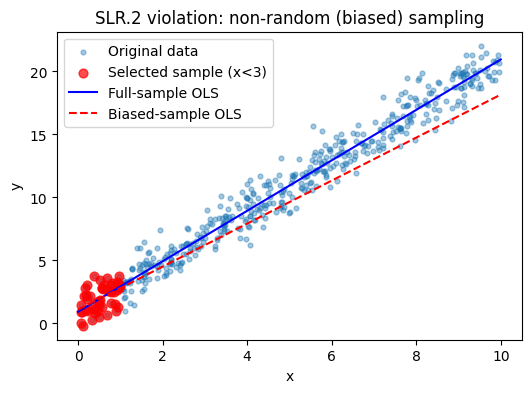

In [ ]:
# **************** You don't need to modify anything in this cell. *****************
# 🔎 Mini demo — Violate SLR.2 — Non-random sampling (select only low-x values)

np.random.seed(320)

# True DGP (all assumptions hold)
n = 500
beta0, beta1 = 1.0, 2.0
x = np.random.uniform(0, 10, n)
u = np.random.normal(0, 1, n)
y = beta0 + beta1*x + u

# OLS with full random sample
b0_full, b1_full = ols_ky_manual(y, x)

# --- Break SLR.2: select only low-x observations ---
mask = x < 1       # only people with smoke less than 1 pack/day report their smoking habits
x_biased = x[mask]
y_biased = y[mask]

b0_bias, b1_bias = ols_ky_manual(y_biased, x_biased)

print(f"True β1 = {beta1}")
print(f"OLS slope (full random sample): b1 = {b1_full:.3f}")
print(f"OLS slope (biased sample, only x<3): b1 = {b1_bias:.3f}")

# Visualize
plt.figure(figsize=(6,4))
plt.scatter(x, y, s=12, alpha=0.4, label="Original data")
plt.scatter(x_biased, y_biased, s=40, alpha=0.7, color="red", label="Selected sample (x<3)")
xs = np.linspace(0, 10, 100)
plt.plot(xs, b0_full + b1_full*xs, color="blue", label="Full-sample OLS")
plt.plot(xs, b0_bias + b1_bias*xs, color="red", linestyle="--", label="Biased-sample OLS")
plt.legend()
plt.title("SLR.2 violation: non-random (biased) sampling")
plt.xlabel("x"); plt.ylabel("y")
plt.show()



<hr style="border: 1px dotted #bbb;">

#### 3️⃣ Violate SLR.3 — No variation in $x$

> **Assumption (SLR.3):** There is **sample variation** in $x$ (i.e., $x_i \neq x_j$ for some $i \neq j$).  

*Meaning:* There is variation in ($x$), so a slope can actually be estimated.  

*If it fails:* Slope is undefined
    - think of the slope formula: $\hat{\beta}_1 = \frac{\text{Cov}(x,y)}{\text{Var}(x)}$ — if $\text{Var}(x) = 0$, then the slope is undefined!

**How we'll break it:** Make $x$ constant for everyone.

**Expect:** The OLS estimate of $\beta_1$ will be **undefined** (if perfectly constant) or **very imprecise** (if nearly constant).


In [31]:
# **************** You don't need to modify anything in this cell. *****************
# 🔎 Mini demo — violate SLR.3 with no variation in x

n = 100
x = np.ones(n)  # ❌ No variation in x (all values are the same, which is 1)
u = np.random.normal(0, 1.0, size=n)
y = 2.0 + 3.0*x + u

b0, b1 = ols_ky_manual(y, x)
print(f"Estimated coefficients: b0={b0}, b1={b1}")
print("********Notice: b1 is NaN (undefined) because Var(x)=0 → cannot divide by zero in slope formula.********")

Estimated coefficients: b0=nan, b1=nan
********Notice: b1 is NaN (undefined) because Var(x)=0 → cannot divide by zero in slope formula.********


/var/folders/c7/4b0dlrp54sj1y71v5yq8xcw00000gn/T/ipykernel_36343/3817906853.py:15: RuntimeWarning: invalid value encountered in scalar divide
  beta1_hat = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()


<hr style="border: 1px dotted #bbb;">

#### 4️⃣ Violate SLR.4 — Exogeneity fails (omitted variable)

> **Assumption (SLR.4):** $E[u \mid x] = 0$  
> *The error term has zero mean, even after conditioning on $x$.*


**How we'll break it:** Add an omitted variable $z$ that:  
- Affects $y$ directly, and  
- Is correlated with $x$.


**Intuitive example:**  
Suppose we want to estimate the effect of **education ($x$)** on **wages ($y$)**.  
But **ability ($z$)** also matters: higher-ability people earn more *and* tend to get more education.  
If we regress wages on education *without controlling for ability*, OLS attributes too much of the wage gap to education.  
👉 That makes $\hat\beta_1$ **biased upward**.


**Expect:** Even with large samples, the OLS slope on $x$ will not converge to the true $\beta_1$ — it will be systematically off.  

We’ll revisit omitted variable bias more formally in a **later lecture**, where we’ll derive the bias formula and see how it depends on $\text{Cov}(x,z)$.  



In [ ]:
# **************** You don't need to modify anything in this cell. *****************
# 🔎 Mini demo — violate SLR.4 with omitted variable (education & wages example)

np.random.seed(320)

n = 500
beta0, beta1, beta2 = 10.0, 2.0, 5.0   # true model: wage = 10 + 2*educ + 5*ability + u

# Simulate data
ability = np.random.normal(0, 1, n)                # latent ability z
education = 12 + 2*ability + np.random.normal(0, 1, n)  # education correlated with ability
u = np.random.normal(0, 2, n)
wage = beta0 + beta1*education + beta2*ability + u

# Case 1: Full model (correct specification, includes ability)
X_full = sm.add_constant(np.column_stack([education, ability]))
model_full = sm.OLS(wage, X_full).fit()

# Case 2: Omitted variable model (only education, omit ability)
X_omit = sm.add_constant(education)
model_omit = sm.OLS(wage, X_omit).fit()

print("True β1 (education effect) =", beta1)
print(f"Estimated β1 (full model, controls for ability): {model_full.params[1]:.3f}")
print(f"Estimated β1 (omit ability): {model_omit.params[1]:.3f}")

print("\nNotice: When ability is omitted, β1 is biased upward, "
      "since ability is positively correlated with education.")



---

## ✅ Wrap-up

- When **SLR.1–SLR.4** hold, OLS is **unbiased** (Theorem 2.1).
- Each assumption is important; violating any one of them can lead to biased or unreliable estimates.


---
**End of Lab Exercise.**